In [1]:
# YOLOv8 model loader and inference engine
from ultralytics import YOLO

# OS utilities (paths, file listing)
import os

# OpenCV for image/video processing and drawing
import cv2

# Matplotlib for displaying images in notebook
import matplotlib.pyplot as plt


In [2]:
# Path to the trained model weights
MODEL_PATH = "runs/detect/runs_fod/yolov8n_fod_v1/weights/best.pt"

# Load the trained YOLOv8 model
fod_model = YOLO(MODEL_PATH)

print("FOD detection model loaded successfully")


FOD detection model loaded successfully


In [3]:
# Print class names learned by the model
print(fod_model.names)


{0: 'FOD'}


In [4]:
# Path to test images
TEST_IMAGE_DIR = "FOD Runway Dataset.v2i.yolov8/test/images"

# Pick the first image (simple and deterministic)
image_name = os.listdir(TEST_IMAGE_DIR)[0]
image_path = os.path.join(TEST_IMAGE_DIR, image_name)

print("Using image:", image_name)


Using image: frame_000000_PNG.rf.61180faffc77160734da31112d771884.jpg


In [5]:
# Run inference on the image
# conf = confidence threshold
results = fod_model(image_path, conf=0.4)

# results is a list (one element per image)
result = results[0]

# Display annotated image
result.show()



image 1/1 D:\personal\FOD\FOD Runway Dataset.v2i.yolov8\test\images\frame_000000_PNG.rf.61180faffc77160734da31112d771884.jpg: 640x640 1 FOD, 77.9ms
Speed: 3.7ms preprocess, 77.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


In [6]:
# The result object contains everything about predictions
print(type(result))


<class 'ultralytics.engine.results.Results'>


In [7]:
# Extract bounding boxes
boxes = result.boxes

print("Number of FOD objects detected:", len(boxes))


Number of FOD objects detected: 1


In [8]:
fod_count = 0  # counter for detected FOD objects

for box in boxes:
    # box.cls is a tensor containing the class index
    class_id = int(box.cls)

    # box.conf is the confidence score (0–1)
    confidence = float(box.conf)

    # Convert class ID to human-readable label
    label = fod_model.names[class_id]

    # Since we only have one class, this is simple
    if label == "FOD":
        fod_count += 1

print("Total FOD detected in image:", fod_count)


Total FOD detected in image: 1


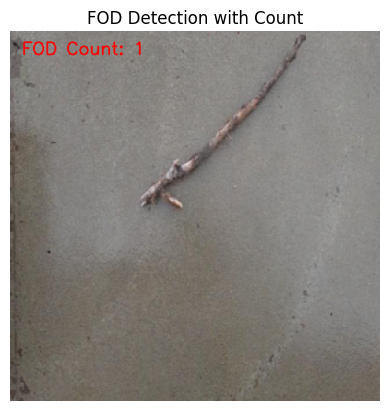

In [9]:
# Load original image manually (YOLO hides it)
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw count text on the image
cv2.putText(
    img,
    f"FOD Count: {fod_count}",
    (20, 40),  # position on image
    cv2.FONT_HERSHEY_SIMPLEX,
    1.0,       # font size
    (255, 0, 0),
    2
)

plt.imshow(img)
plt.axis("off")
plt.title("FOD Detection with Count")
plt.show()


In [12]:
# CUSTOM IMAGE TEST

# -----------------------------
# PATH SETUP
# -----------------------------

# Path to your trained model
MODEL_PATH = "runs/detect/runs_fod/yolov8n_fod_v1/weights/best.pt"

# Path to the NEW image you downloaded
# Change the filename if yours is different
NEW_IMAGE_PATH = "test_files/FOD_Kadena_Air_Base.jpg"

# -----------------------------
# LOAD MODEL
# -----------------------------

# Load the trained YOLOv8 model (no training happens here)
from ultralytics import YOLO
fod_model = YOLO(MODEL_PATH)

# -----------------------------
# RUN INFERENCE
# -----------------------------

# conf = confidence threshold
# Lower value → more detections (more false positives)
# Higher value → fewer detections (more misses)
results = fod_model(NEW_IMAGE_PATH, conf=0.4)

# YOLO returns a list (one result per image)
result = results[0]

# -----------------------------
# DISPLAY IMAGE WITH BOXES
# -----------------------------

# Show the image with bounding boxes and labels drawn by YOLO
result.show()



image 1/1 D:\personal\FOD\test_images\FOD_Kadena_Air_Base.jpg: 512x640 1 FOD, 56.8ms
Speed: 2.2ms preprocess, 56.8ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)


In [13]:
fod_model(
    source="test_files/VID_20260124_081451332.mp4",  # replace with your video path
    conf=0.4,
    save=True,
    show=False
)



WARNING 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/536) D:\personal\FOD\test_files\VID_20260124_081451332.mp4: 640x384 1 FOD, 49.8ms
video 1/1 (frame 2/536) D:\personal\FOD\test_files\VID_20260124_081451332.mp4: 640x384 1 FOD, 37.9ms
video 1/1 (frame 3/536) D:\personal\FOD\test_files\VID_20260124_081451332.mp4: 640x384 1 FOD, 38.3ms
video 1/1 (frame 4/536) D:\personal\FOD\test_files\VID_20260124_081451332.mp4: 640x384 (no detections), 37.3ms
video 1/1 (frame 5/536) D:\personal\FOD\test_fi

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'FOD'}
 obb: None
 orig_img: array([[[ 56,  60,  62],
         [ 56,  60,  62],
         [ 56,  60,  62],
         ...,
         [144, 142, 133],
         [146, 144, 135],
         [148, 146, 137]],
 
        [[ 56,  60,  62],
         [ 56,  60,  62],
         [ 56,  60,  62],
         ...,
         [146, 144, 135],
         [144, 142, 133],
         [147, 145, 136]],
 
        [[ 57,  61,  63],
         [ 57,  61,  63],
         [ 57,  61,  63],
         ...,
         [146, 144, 135],
         [144, 142, 133],
         [146, 144, 135]],
 
        ...,
 
        [[ 62,  56,  44],
         [ 62,  56,  44],
         [ 62,  56,  44],
         ...,
         [ 67,  65,  48],
         [ 68,  67,  47],
         [ 68,  67,  47]],
 
        [[ 62,  56,  44],
         [ 61,  55,  43],
         [ 61,  55,  43],
         ...,
         [ 67,  65,  